In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import chardet
import seaborn as sns

# 'Student performance file'
file_path='C:\\Users\\User\\Desktop\\Student performance\\pythonProject\\Student_Performance.csv'
# df = pd.read_csv(file_path)
# print(df)
with open(file_path, 'rb') as f:
    result = chardet.detect(f.read())
    print(result) # Use the detected encoding
df = pd.read_csv(file_path, encoding=result['encoding'])

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [12]:
# %pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 217.9 kB/s eta 0:00:02
   ---- ---------------------------------- 30.7/294.9 kB 217.9 kB/s eta 0:00:02
   ---- ---------------------------------- 30.7/294.9 kB 217.9 kB/s eta 0:00:02
   ---- ---------------------------------- 30.7/294.9 kB 217.9 kB/s eta 0:00:02
   ---- ---------------------------------- 30.7/294.9 kB 217.9 kB/s eta 0:00:02
   ---- ---------------------------------- 30.7/294.9 kB 217.9 kB/s eta 0:00:02
   ---- ---------------------------------- 30.7/294.9 kB 217.9 kB/s eta 0:00:02
   ---- ----


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
#original data set
print("The original dataset")

The original dataset


In [15]:
for index, row in df.iterrows():
    if row['Extracurricular Activities'] == 'Yes':
        df.at[index, 'Extracurricular Activities'] = 1
    elif row['Extracurricular Activities'] == 'No':
        df.at[index, 'Extracurricular Activities'] = 0

In [22]:


df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [57]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [71]:
#removing the duplicates
print("Removing duplicates")

Removing duplicates


In [72]:
dup=df.drop_duplicates(inplace=True)
print(dup)

None


(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

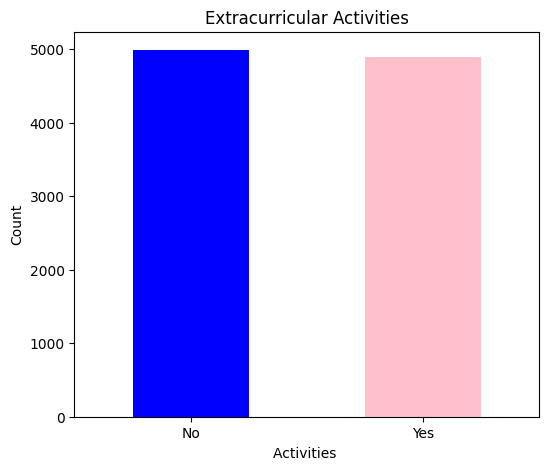

In [73]:
#Extracurricular Activities
activities_counts = df['Extracurricular Activities'].value_counts()
plt.figure(figsize=(6, 5))
activities_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Extracurricular Activities')
plt.xlabel('Activities ')
plt.ylabel('Count')
plt.xticks(rotation=0)

Text(0, 0.5, 'Performance Index')

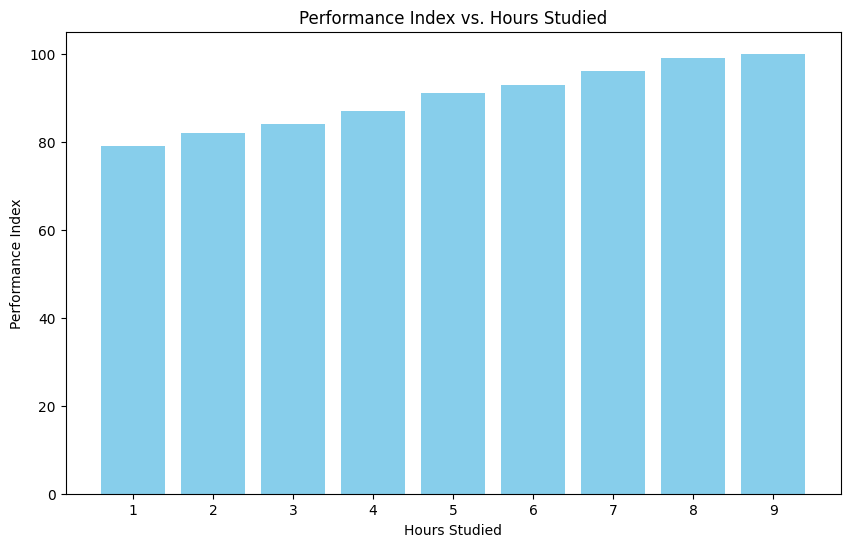

In [74]:
# Hours Studied vs Performance Index
plt.figure(figsize=(10, 6))
plt.bar(df['Hours Studied'], df['Performance Index'], color='skyblue')
plt.xticks(ticks=range(1, 10), labels=range(1, 10))
plt.title('Performance Index vs. Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')

In [56]:
#Sleep Hours vs Performance index
"""plt.figure(figsize=(10, 6))
plt.bar(df['Sleep Hours'], df['Performance Index'], color='purple', width=.5)
plt.xticks(ticks=range(4, 10), labels=range(4, 10))
plt.title('Performance Index vs. Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Performance Index')
plt.tight_layout()"""

"plt.figure(figsize=(10, 6))\nplt.bar(df['Sleep Hours'], df['Performance Index'], color='purple', width=.5)\nplt.xticks(ticks=range(4, 10), labels=range(4, 10))\nplt.title('Performance Index vs. Sleep Hours')\nplt.xlabel('Sleep Hours')\nplt.ylabel('Performance Index')\nplt.tight_layout()"

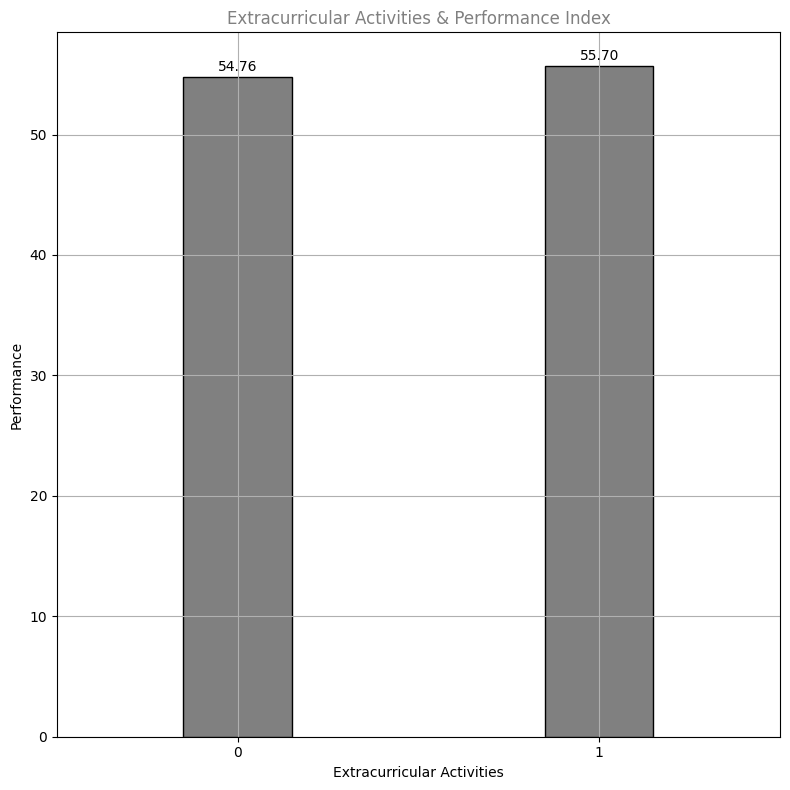

In [55]:
# Calculate average performance index for each group
avg_activities = df.groupby('Extracurricular Activities')['Performance Index'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(8, 8))
barplot = sns.barplot(data=avg_activities, x="Extracurricular Activities", y="Performance Index", color='grey', width=.3, edgecolor='black')

# Add average performance index on top of each bar
for index, row in avg_activities.iterrows():
    barplot.text(
        index, 
        row['Performance Index'] + 0.5,  # Adjust vertical positioning if necessary
        f'{row["Performance Index"]:.2f}',  # Format text to 2 decimal places
        color='black', 
        ha='center'
    )

# Customize plot appearance
plt.title('Extracurricular Activities & Performance Index', color='grey')
plt.xlabel('Extracurricular Activities')
plt.ylabel('Performance')
plt.grid(True)
plt.tight_layout()


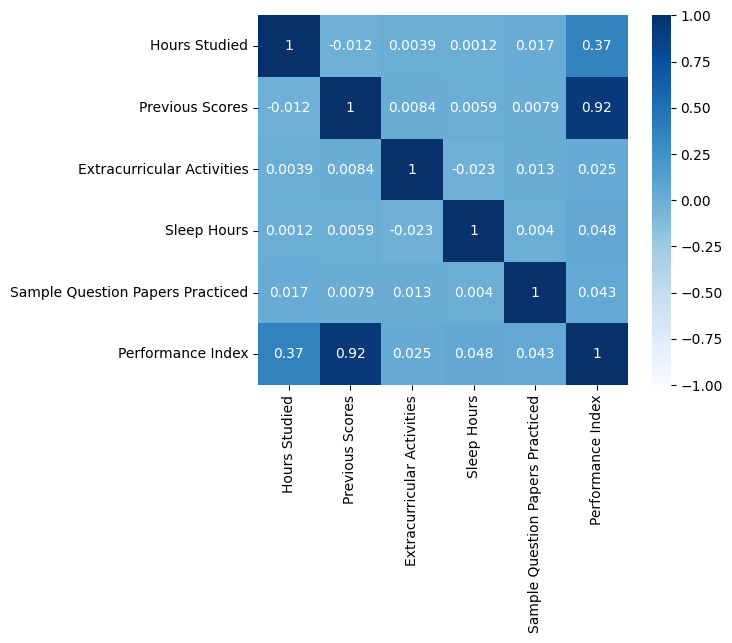

In [19]:
dataa_frame = df.corr()

axis_corr = sns.heatmap(
    
dataa_frame,
annot=True,
vmin=-1, vmax=1, center=0,
cmap='Blues',  # Use the 'Blues' color map
square=True
)

plt.show()

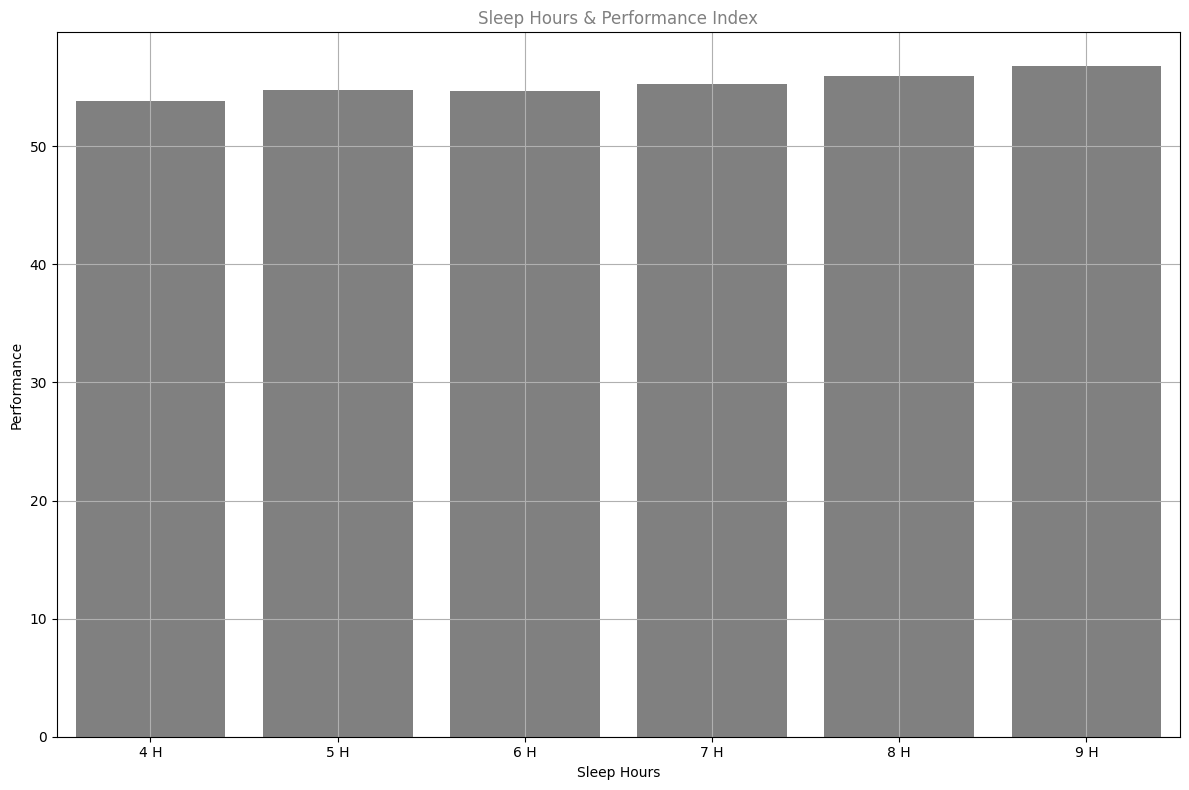

In [46]:

avg_performance=df.groupby('Sleep Hours')['Performance Index'].mean().reset_index()

hours = [f'{i} H' for i in avg_performance['Sleep Hours'].unique()]

plt.figure(figsize=(12,8))
sns.barplot(data=avg_performance , x=hours , y="Performance Index", color='grey')
for index, row in avg_performance.iterrows():
    barplot.text(
        index, 
        row['Performance Index'] + 0.5,  # Adjust vertical positioning if necessary
        f'{row["Performance Index"]:.2f}',  # Format text to 2 decimal places
        color='black', 
        ha='center'
    )
plt.title('Sleep Hours & Performance Index', color='grey')
plt.xlabel('Sleep Hours')
plt.ylabel('Performance')
plt.grid(True)
plt.tight_layout()


C:\Users\User\AppData\Local\Temp\ipykernel_11536\3848221615.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=avg_sample, x=hours, y="Performance Index", palette='Blues')


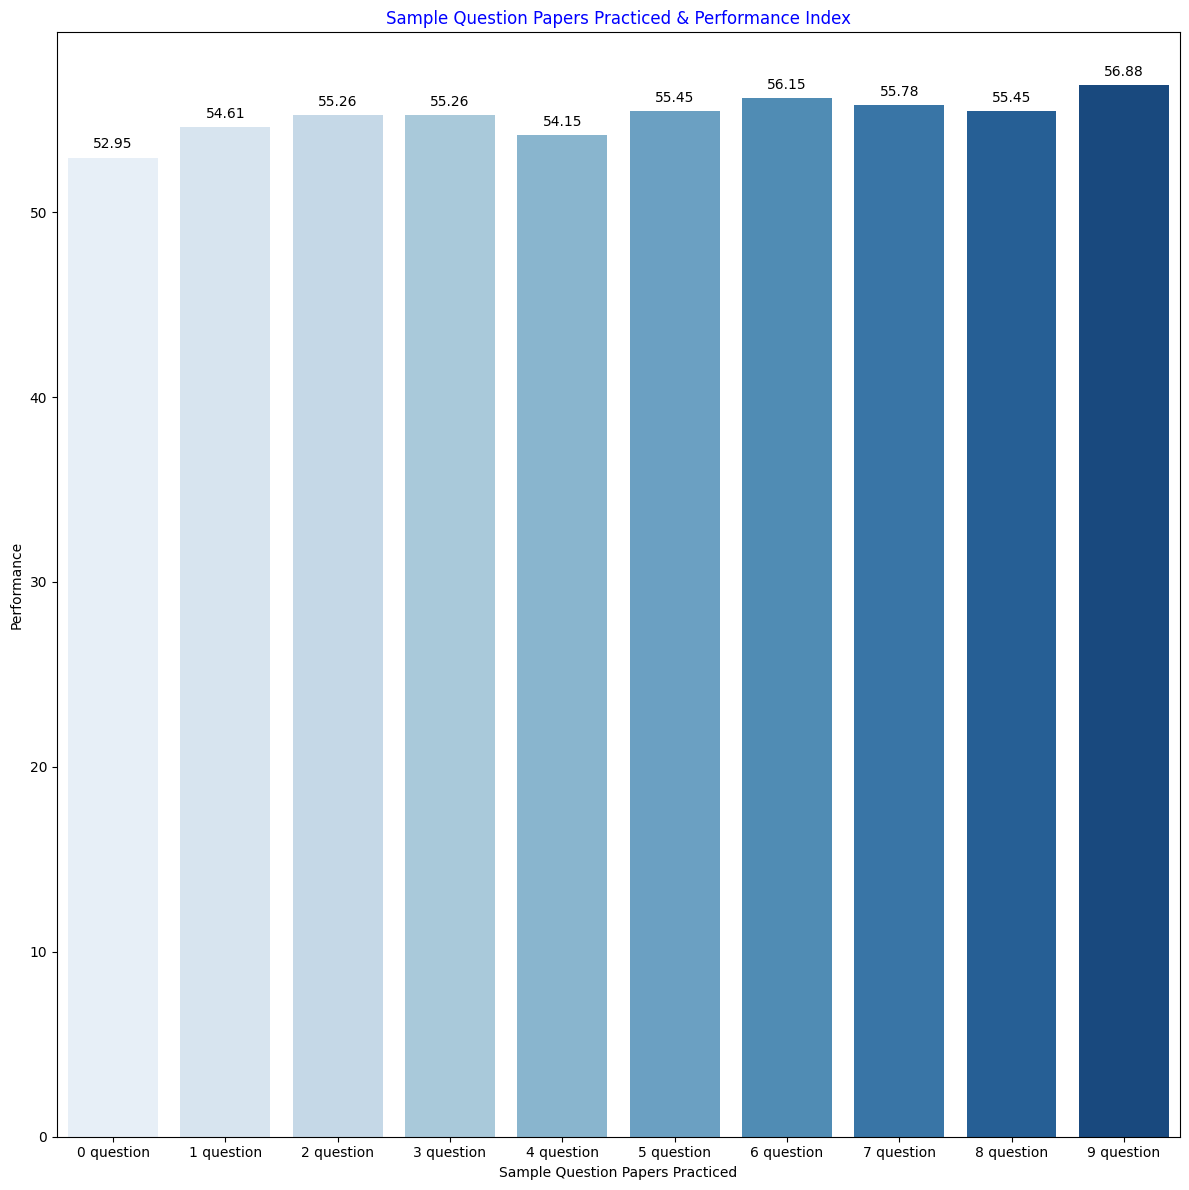

In [42]:
avg_sample = df.groupby('Sample Question Papers Practiced')['Performance Index'].mean().reset_index()

# Create labels for x-axis
hours = [f'{i} question' for i in avg_sample['Sample Question Papers Practiced']]

plt.figure(figsize=(12, 12))

# Create bar plot
barplot = sns.barplot(data=avg_sample, x=hours, y="Performance Index", palette='Blues')

# Add average performance score on top of each bar
for index, row in avg_sample.iterrows():
    barplot.text(
        index, 
        row['Performance Index'] + 0.5,  # Adjust vertical positioning if necessary
        f'{row["Performance Index"]:.2f}',  # Format text to 2 decimal places
        color='black', 
        ha='center'
    )

plt.title('Sample Question Papers Practiced & Performance Index', color='blue')
plt.xlabel('Sample Question Papers Practiced')
plt.ylabel('Performance')
plt.tight_layout()
plt.show()

In [10]:
#%pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


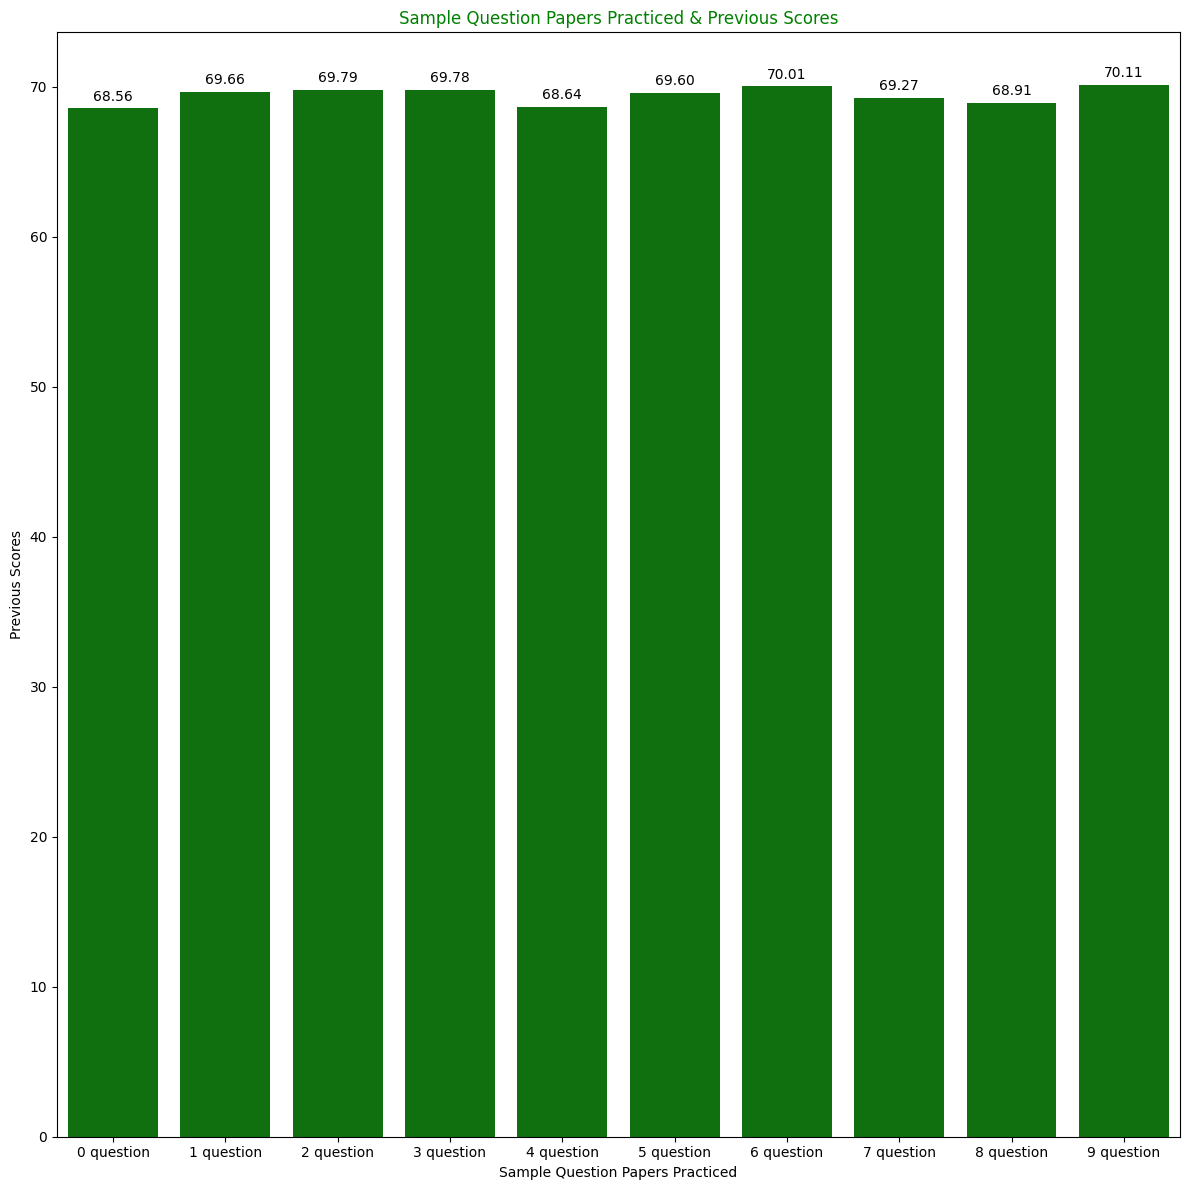

In [17]:
avg_sample = df.groupby('Sample Question Papers Practiced')['Previous Scores'].mean().reset_index()

# Create labels for x-axis
hours = [f'{i} question' for i in avg_sample['Sample Question Papers Practiced']]

plt.figure(figsize=(12, 12))

# Create bar plot
barplot = sns.barplot(data=avg_sample, x=hours, y="Previous Scores", color='green')

# Add average performance score on top of each bar
for index, row in avg_sample.iterrows():
    barplot.text(
        index, 
        row['Previous Scores'] + 0.5,  # Adjust vertical positioning if necessary
        f'{row["Previous Scores"]:.2f}',  # Format text to 2 decimal places
        color='black', 
        ha='center'
    )

plt.title('Sample Question Papers Practiced & Previous Scores', color='green')
plt.xlabel('Sample Question Papers Practiced')
plt.ylabel('Previous Scores')
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_18084\1607568305.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score Type', y='Previous Scores', data=plot_df, palette=['pink', 'red'])


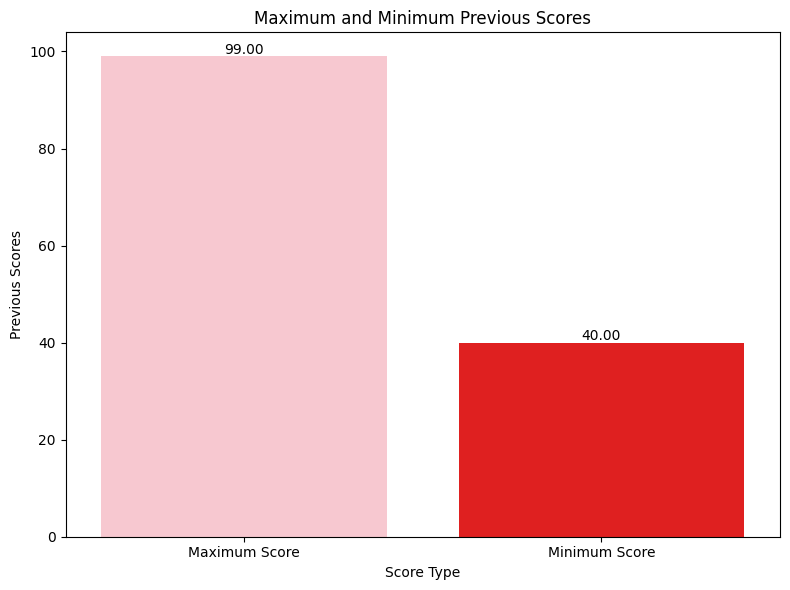

In [29]:
# Compute the maximum and minimum values
max_score = df['Previous Scores'].max()
min_score = df['Previous Scores'].min()

# Data for plotting
data = {
    'Score Type': ['Maximum Score', 'Minimum Score'],
    'Previous Scores': [max_score, min_score]
}

# Create a DataFrame for the plot
plot_df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))

# Create bar plot
sns.barplot(x='Score Type', y='Previous Scores', data=plot_df, palette=['pink', 'red'])

# Add value labels on top of the bars
for index, row in plot_df.iterrows():
    plt.text(index, row['Previous Scores'] + 0.5, f'{row["Previous Scores"]:.2f}', color='black', ha='center')

# Customize plot
plt.title('Maximum and Minimum Previous Scores', color='black')
plt.xlabel('Score Type')
plt.ylabel('Previous Scores')

plt.tight_layout()
plt.show()

In [31]:
%pip install statsmodels



   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB 495.5 kB/s eta 0:00:20
   ---------------------------------------- 0.1/9.8 MB 845.5 kB/s eta 0:00:12
    --------------------------------------- 0.2/9.8 MB 919.0 kB/s eta 0:00:11
    --------------------------------------- 0.2/9.8 MB 986.4 kB/s eta 0:00:10
   - -------------------------------------- 0.3/9.8 MB 1.2 MB/s eta 0:00:09
   - -------------------------------------- 0.4/9.8 MB 1.1 MB/s eta 0:00:09
   - -------------------------------------- 0.4/9.8 MB 1.1 MB/s eta 0:00:09
   - -------------------------------------- 0.4/9.8 MB 1.1 MB/s eta 0:00:09
   - -------------------------------------- 0.5/9.8 MB 1.1 MB/s eta 0:00:09
   - -------------------------------------- 0.5/9.8 MB 1.1 MB/s eta 0:00:09
   -- ------------------------------------- 0.5/9.8 MB 900.2 kB/s eta 0:00:11
   -- ----------


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
import statsmodels.api as sm


                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                 1.758e+04
Date:                Sun, 04 Aug 2024   Prob (F-statistic):               0.00
Time:                        11:01:38   Log-Likelihood:                -34560.
No. Observations:               10000   AIC:                         6.913e+04
Df Residuals:                    9996   BIC:                         6.916e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

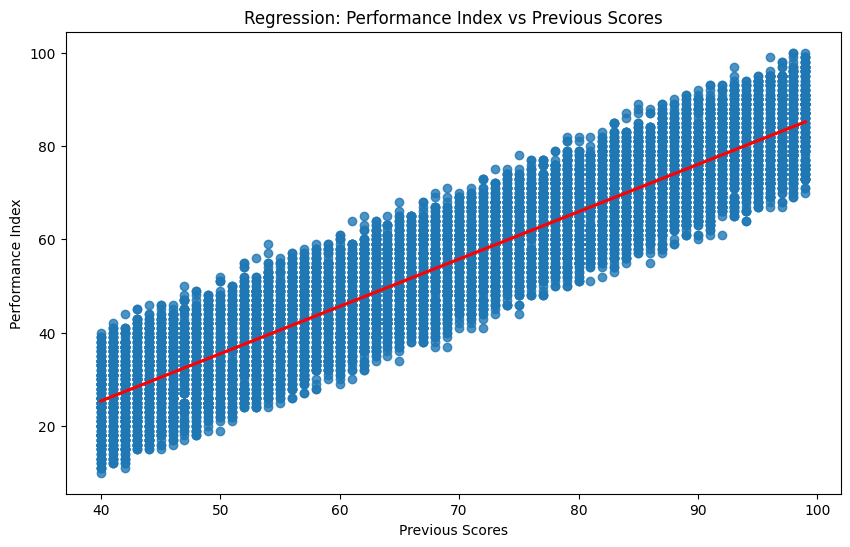

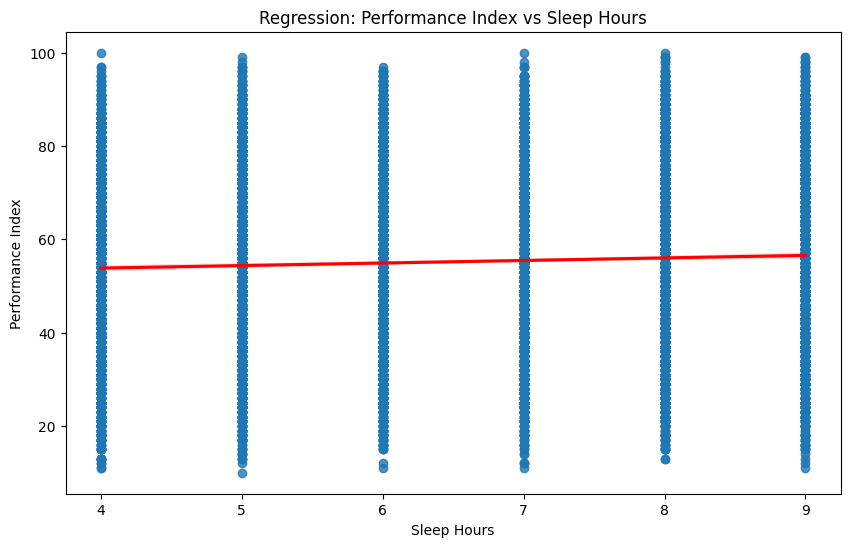

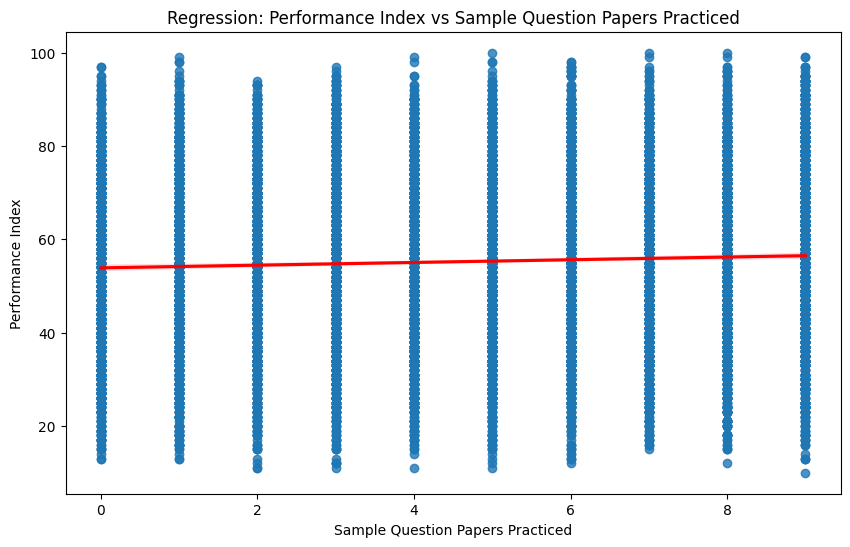

In [33]:
# Define the dependent variable and independent variables
X = df[['Previous Scores',  'Sleep Hours', 'Sample Question Papers Practiced']]
y = df['Performance Index']

# Add a constant to the independent variables matrix (intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# Plot regression plots for each independent variable
for column in X.columns[1:]:
    plt.figure(figsize=(10, 6))
    sns.regplot(x=df[column], y=y, line_kws={'color': 'red'})
    plt.title(f'Regression: Performance Index vs {column}')
    plt.xlabel(column)
    plt.ylabel('Performance Index')
    plt.show()